In [1]:
#########################################################################################################################
# Kurs: Data science, studia zaoczne, Informatyka w Biznesie
# Data ostatniej poprawki: 04.12.2018
# Autorzy: Mariusz Czarny, Juliusz Sadowski, Anita Koszalko

# Celem projektu jest zastosowanie języka Python przy użyciu bibliotek pandas, nympy, itp., aby wykonać analizę danych.
# Danymi źródłowymi są pliki tekstowe: campaigns.txt, customers.txt, orderlines.txt, orders.txt, products.txt pobrane z
# serwera: https://drive.google.com/drive/folders/0B1A_5ELLOtW4VXgwOG1oZmhpS0k
# Ścieżka źródłowa dla plików: powinny znajdować się w tym samym katalogu co plik projektowy
# Wersja pythona: 3.6.3
# Plik dostępny jest także pod linkiem: 
# macierz korelacji
# funckja celu
# predykcja sprzedazy
# probka testowa/uczaca
# regresja liniowa/logistyczna

# User story: 
#########################################################################################################################

In [2]:
# import wewenętrznej bazy danych
import sqlite3

In [3]:
# import standardowych bibliotek
import pandas as pd
import numpy as np
import os

In [4]:
# import bibliotek służących do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# sprawdza aktualną ścieżkę
%pwd

'C:\\Users\\Mariusz\\studia\\3 semestr\\Data science\\my project'

In [6]:
# połączenie z bazą i wykorzystanie kursora
dbConnection = sqlite3.connect("bookdb");
dbCursor = dbConnection.cursor()

In [7]:
# rozszerzenie plików zawierających dane do wczytania
txtExtention = ".txt"

In [8]:
# tablica z nazwami plików do oczytu, zawierające dane, które będą importowane do tabel bazodanowych
tables = ["Customers", "Orderlines", "Products", "Orders", "Campaigns"]

In [9]:
# wczytywanie kolejnych plików w pętli for
for table in tables:
    # ustawienie scieżki (nazwy plików pisane małymy literami)
    path = os.path.expanduser(table.lower() + txtExtention)
    # wczytywanie pliku używając delimitera tabulacji oraz kodowania 'latin1'
    file = pd.read_csv(path, delimiter="\t", encoding = 'latin1')
    # tworzy na podstawie pliku tabele i wypełnia ją rekordami, jesli istnieje zostaje nadpisana
    file.to_sql(table, dbConnection, if_exists="replace");

In [10]:
ordersSelect = '''SELECT totalprice, numunits, campaignid, customerid, orderid from orders '''
orders = pd.read_sql_query(ordersSelect, dbConnection)
orders.head()

,totalprice,numunits,campaignid,customerid,orderid
0,190.00,3,2141,45978,1002854
1,10.00,1,2173,125381,1002855
2,35.22,2,2141,103122,1002856
3,10.00,1,2173,130980,1002857
4,10.00,1,2141,48553,1002886


In [11]:
customersSelect = '''SELECT customerid, gender from customers '''
customers = pd.read_sql_query(customersSelect, dbConnection)

In [12]:
customers.head()

,customerid,gender
0,174596,M
1,68239,M
2,10203,F
3,174288,F
4,68099,M


In [13]:
ordersCustomer = orders.merge(customers, on='customerid')

In [14]:
ordersCustomer.head()

,totalprice,numunits,campaignid,customerid,orderid,gender
0,190.00,3,2141,45978,1002854,M
1,10.00,1,2173,125381,1002855,M
2,35.22,2,2141,103122,1002856,None
3,10.00,1,2173,130980,1002857,F
4,10.00,1,2141,48553,1002886,None


In [15]:
selectCampaigns = '''SELECT discount, campaignid from campaigns '''
campaignsDF = pd.read_sql_query(selectCampaigns, dbConnection)
campaignsDF.sort_values(by=["discount"], ascending=0).head(100)

,discount,campaignid
97,50,2098
96,50,2097
65,50,2066
72,50,2073
22,50,2023
187,50,2188
21,45,2022
184,40,2185
37,32,2038
94,30,2095


In [16]:
ordersCustomerAndCampaigns = ordersCustomer.merge(campaignsDF, on='campaignid')
ordersCustomerAndCampaigns.head()

,totalprice,numunits,campaignid,customerid,orderid,gender,discount
0,190.00,3,2141,45978,1002854,M,10
1,35.22,2,2141,103122,1002856,None,10
2,10.00,1,2141,48553,1002886,None,10
3,10.00,1,2141,130970,1003044,F,10
4,17.50,1,2141,21927,1003046,F,10


In [17]:
orderLinesSelect = '''SELECT orderlineid, orderid, productid, billdate from Orderlines '''
orderLines = pd.read_sql_query(orderLinesSelect, dbConnection)

In [18]:
orderLines.head()

,orderlineid,orderid,productid,billdate
0,1010561,1006414,10834,2011-03-08 00:00:00
1,1010562,1006541,11052,2011-01-20 00:00:00
2,1010563,1006542,11070,2011-01-20 00:00:00
3,1010564,1010154,11196,2009-11-20 00:00:00
4,1010565,1009110,11048,2009-11-12 00:00:00


In [131]:
orderlinesOrderCustomerCampaign = orderLines.merge(ordersCustomerAndCampaigns, on='orderid')

In [132]:
orderlinesOrderCustomerCampaign.head(20)

,orderlineid,orderid,productid,billdate,totalprice,numunits,campaignid,customerid,gender,discount
0,1010561,1006414,10834,2011-03-08 00:00:00,36.00,2,2141,48167,M,10
1,1010560,1006414,10842,2011-01-20 00:00:00,36.00,2,2141,48167,M,10
2,1010562,1006541,11052,2011-01-20 00:00:00,20.00,2,2141,15824,M,10
3,1010563,1006542,11070,2011-01-20 00:00:00,19.12,1,2141,124842,M,10
4,1010564,1010154,11196,2009-11-20 00:00:00,14.95,1,2173,49720,M,0
5,1010565,1009110,11048,2009-11-12 00:00:00,49.90,4,2141,102019,F,10
6,1010566,1009110,11196,2009-11-20 00:00:00,49.90,4,2141,102019,F,10
7,1010567,1008491,10816,2009-11-04 00:00:00,175.00,1,2141,119644,F,10
8,1010568,1008492,11048,2009-11-11 00:00:00,10.00,1,2173,105604,M,0
9,1010569,1010189,11196,2009-11-20 00:00:00,14.95,1,2173,108223,F,0


In [133]:
orderlinesOrderCustomerCampaign["year"] = pd.to_datetime(orderlinesOrderCustomerCampaign["billdate"]).dt.year
orderlinesOrderCustomerCampaign.head()

,orderlineid,orderid,productid,billdate,totalprice,numunits,campaignid,customerid,gender,discount,year
0,1010561,1006414,10834,2011-03-08 00:00:00,36.00,2,2141,48167,M,10,2011
1,1010560,1006414,10842,2011-01-20 00:00:00,36.00,2,2141,48167,M,10,2011
2,1010562,1006541,11052,2011-01-20 00:00:00,20.00,2,2141,15824,M,10,2011
3,1010563,1006542,11070,2011-01-20 00:00:00,19.12,1,2141,124842,M,10,2011
4,1010564,1010154,11196,2009-11-20 00:00:00,14.95,1,2173,49720,M,0,2009


In [134]:
orderlinesOrderCustomerCampaign["month"] = pd.to_datetime(orderlinesOrderCustomerCampaign["billdate"]).dt.month
orderlinesOrderCustomerCampaign.head()

,orderlineid,orderid,productid,billdate,totalprice,numunits,campaignid,customerid,gender,discount,year,month
0,1010561,1006414,10834,2011-03-08 00:00:00,36.00,2,2141,48167,M,10,2011,3
1,1010560,1006414,10842,2011-01-20 00:00:00,36.00,2,2141,48167,M,10,2011,1
2,1010562,1006541,11052,2011-01-20 00:00:00,20.00,2,2141,15824,M,10,2011,1
3,1010563,1006542,11070,2011-01-20 00:00:00,19.12,1,2141,124842,M,10,2011,1
4,1010564,1010154,11196,2009-11-20 00:00:00,14.95,1,2173,49720,M,0,2009,11


In [137]:
orderlinesOrderCustomerCampaign["month"] = pd.to_datetime(orderlinesOrderCustomerCampaign['billdate']).dt.strftime('%b')
orderlinesOrderCustomerCampaign.head()

,orderlineid,orderid,productid,billdate,totalprice,numunits,campaignid,customerid,gender,discount,year,month
0,1010561,1006414,10834,2011-03-08 00:00:00,36.00,2,2141,48167,M,10,2011,Mar
1,1010560,1006414,10842,2011-01-20 00:00:00,36.00,2,2141,48167,M,10,2011,Jan
2,1010562,1006541,11052,2011-01-20 00:00:00,20.00,2,2141,15824,M,10,2011,Jan
3,1010563,1006542,11070,2011-01-20 00:00:00,19.12,1,2141,124842,M,10,2011,Jan
4,1010564,1010154,11196,2009-11-20 00:00:00,14.95,1,2173,49720,M,0,2009,Nov


In [138]:
totalpriceByDate = orderlinesOrderCustomerCampaign.drop(['orderlineid', 'orderid', 'productid', 'billdate', 'numunits', 'campaignid', 'customerid', 'gender', 'discount'], axis = 1)

In [139]:
flights_long = sns.load_dataset("flights")
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [140]:
flights_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [149]:
totalpriceByDate['totalprice']  = totalpriceByDate.totalprice.astype(int)
totalpriceByDate['year']  = totalpriceByDate.year.astype(str)
totalpriceByDate.head()

,year,month,totalprice
0,2011,Mar,36
1,2011,Jan,36
2,2011,Jan,20
3,2011,Jan,19
4,2009,Nov,14


In [150]:
totalpriceByDate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280853 entries, 0 to 280852
Data columns (total 3 columns):
year          280853 non-null object
month         280853 non-null object
totalprice    280853 non-null int32
dtypes: int32(1), object(2)
memory usage: 7.5+ MB


In [151]:
totalpriceByDate = totalpriceByDate[['year','month','totalprice']]
totalpriceByDate.head()

,year,month,totalprice
0,2011,Mar,36
1,2011,Jan,36
2,2011,Jan,20
3,2011,Jan,19
4,2009,Nov,14


In [152]:
matrix = pd.pivot_table(totalpriceByDate, index=["month"])
matrix

,totalprice
month,
Apr,167.937380
Aug,131.893050
Dec,93.598290
Feb,91.506239
Jan,113.219423
Jul,137.048553
Jun,123.663898
Mar,177.594588
May,113.995476


In [22]:
orderlinesOrderCustomerCampaign = orderlinesOrderCustomerCampaign.drop(columns=["orderlineid", "orderid", "productid", "campaignid"])

In [23]:
orderlinesOrderCustomerCampaign.head(20)

,billdate,totalprice,numunits,customerid,gender,discount
0,2011,36.00,2,48167,M,10
1,2011,36.00,2,48167,M,10
2,2011,20.00,2,15824,M,10
3,2011,19.12,1,124842,M,10
4,2009,14.95,1,49720,M,0
5,2009,49.90,4,102019,F,10
6,2009,49.90,4,102019,F,10
7,2009,175.00,1,119644,F,10
8,2009,10.00,1,105604,M,0
9,2009,14.95,1,108223,F,0


In [24]:
sex = pd.get_dummies(orderlinesOrderCustomerCampaign["gender"])
orderlinesOrderCustomerCampaign["gender"] = sex

In [25]:
orderlinesOrderCustomerCampaign.head(20)

,billdate,totalprice,numunits,customerid,gender,discount
0,2011,36.00,2,48167,0,10
1,2011,36.00,2,48167,0,10
2,2011,20.00,2,15824,0,10
3,2011,19.12,1,124842,0,10
4,2009,14.95,1,49720,0,0
5,2009,49.90,4,102019,1,10
6,2009,49.90,4,102019,1,10
7,2009,175.00,1,119644,1,10
8,2009,10.00,1,105604,0,0
9,2009,14.95,1,108223,1,0


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

model = LinearRegression(fit_intercept=True)
model = GaussianNB()

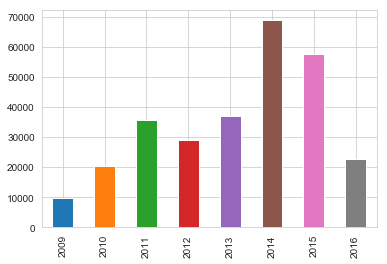

In [27]:
barGraph = orderlinesOrderCustomerCampaign
(barGraph.billdate).value_counts().sort_index().plot(kind='bar')

In [28]:
groupedByCustomerTemp = orderlinesOrderCustomerCampaign.groupby(['customerid', 'billdate']).size()
groupedByCustomer = groupedByCustomerTemp.unstack()
groupedByCustomer = groupedByCustomer.fillna(0)
groupedByCustomer.head(50)

billdate,2009,2010,2011,2012,2013,2014,2015,2016
customerid,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
type(groupedByCustomerTemp)
groupedByCustomerTemp

customerid  billdate
1           2012        1
2           2011        1
3           2014        1
4           2010        1
5           2011        1
6           2010        1
7           2014        3
8           2014        4
9           2010        1
10          2015        3
11          2014        1
12          2012        1
13          2011        1
14          2011        1
15          2014        1
16          2015        2
17          2015        1
18          2016        1
19          2011        2
20          2011        1
21          2011        1
22          2009        2
23          2016        1
24          2012        1
25          2010        2
26          2009        1
27          2011        1
28          2015        1
29          2016        1
30          2012        1
                       ..
189530      2016        2
189531      2016        1
189532      2016        1
189533      2016        1
189534      2016        2
189535      2016        2
189536      2016 

In [30]:
vectorBy2016 = groupedByCustomer.loc[:,2016]
vectorBy2016.head(50)

customerid
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    1.0
19    0.0
20    0.0
21    0.0
22    0.0
23    1.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    1.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    1.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
Name: 2016, dtype: float64

In [43]:
matrix = groupedByCustomer.loc[:,[2009,2010,2011,2012,2014,2015]]

In [44]:
pct_missing = round((orderlinesOrderCustomerCampaign.isnull().sum())/(orderlinesOrderCustomerCampaign.isnull().count())*100,1)
pct_missing.sort_values(ascending=False).head()

discount      0.0
gender        0.0
customerid    0.0
numunits      0.0
totalprice    0.0
dtype: float64

In [45]:
#train.isnull()
orderlinesOrderCampaign = orderlinesOrderCustomerCampaign.drop(['customerid', 'gender'], axis = 1)
orderlinesOrderCampaign.head()

,billdate,totalprice,numunits,discount
0,2011,36.00,2,10
1,2011,36.00,2,10
2,2011,20.00,2,10
3,2011,19.12,1,10
4,2009,14.95,1,0


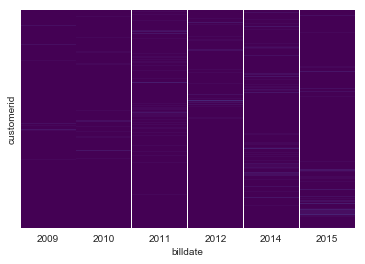

In [46]:
sns.heatmap(data=matrix, yticklabels=False, 
            cbar=False, cmap='viridis' )

In [48]:
flights_long = sns.load_dataset("flights")

In [49]:
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


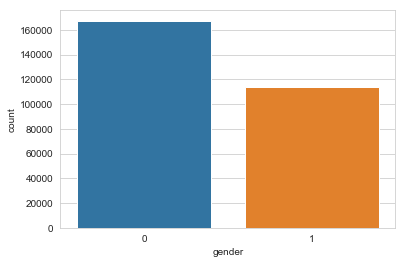

In [47]:
sns.countplot(x='gender', data=orderlinesOrderCustomerCampaign)#, palette='coolwarm')

In [35]:
X = orderlinesOrderCustomerCampaign.drop('numunits', axis = 1)
y = orderlinesOrderCustomerCampaign['numunits']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predictions))

NameError: name 'predictions' is not defined

In [ ]:
from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(c.loc[:,[2009,2010,2011,2012,2014,2015]], c.loc[:,2016], random_state=0,
                                  train_size=0.5)

In [ ]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                      
model.fit(X1, y1)                  
y_model = model.predict(X2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(X1, y1)                  
y_model2 = model2.predict(X2)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y2, y_model2)